In [1]:
# Install library for reading JPK File
%pip uninstall pyafmreader --yes
%pip install git+https://github.com/jlopezalo/pyafmreader.git

Found existing installation: pyafmreader x.x.x
Uninstalling pyafmreader-x.x.x:
  Successfully uninstalled pyafmreader-x.x.x
Note: you may need to restart the kernel to use updated packages.
  Cloning https://github.com/jlopezalo/pyafmreader.git to /private/var/folders/4k/ps22fmxj3gx6vls78t2p63wh0000gn/T/pip-req-build-r_4_4ym3
  Running command git clone --filter=blob:none --quiet https://github.com/jlopezalo/pyafmreader.git /private/var/folders/4k/ps22fmxj3gx6vls78t2p63wh0000gn/T/pip-req-build-r_4_4ym3
  Resolved https://github.com/jlopezalo/pyafmreader.git to commit 455c83796458190d25d9ff9b6a4ad8b3e40680b4
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/TkTech/fasterzip.git to /private/var/folders/4k/ps22fmxj3gx6vls78t2p63wh0000gn/T/pip-install-1zmgg70w/fasterzip_0965804fd3524176981ac4861629231b
  Running command git clone --filter=blob:none --quiet https://github.com/TkTech/fasterzip.git /private/var/folders/4k/ps22fmxj3gx6vls78t2p63wh0000gn/T/pip-install-1zmgg7

In [2]:
# Install library for AFM data Rheology Analysis
%pip uninstall pyafmrheo --yes
%pip install git+https://github.com/jlopezalo/pyafmrheo.git

Found existing installation: pyafmrheo 0.0.1
Uninstalling pyafmrheo-0.0.1:
  Successfully uninstalled pyafmrheo-0.0.1
Note: you may need to restart the kernel to use updated packages.
  Cloning https://github.com/jlopezalo/pyafmrheo.git to /private/var/folders/4k/ps22fmxj3gx6vls78t2p63wh0000gn/T/pip-req-build-kn54e2z7
  Running command git clone --filter=blob:none --quiet https://github.com/jlopezalo/pyafmrheo.git /private/var/folders/4k/ps22fmxj3gx6vls78t2p63wh0000gn/T/pip-req-build-kn54e2z7
  Resolved https://github.com/jlopezalo/pyafmrheo.git to commit b476492801bd2c0b70581a83631a217a60c7de5e
  Preparing metadata (setup.py) ... done
  Created wheel for pyafmrheo: filename=pyafmrheo-0.0.1-py3-none-any.whl size=30948 sha256=18ee9fd37b027e59858a44503a01fbaa3cc5970c75c34b738b47ee74c07b3fe8
  Stored in directory: /private/var/folders/4k/ps22fmxj3gx6vls78t2p63wh0000gn/T/pip-ephem-wheel-cache-r7k4__sc/wheels/45/a3/5e/2d19803e3cbf5fe45f904090127b31ec30fc304c6b6e5e0f70
Successfully built pya

In [3]:
# Import libraries we will need
import numpy as np
import matplotlib.pyplot as plt

# Get file reader from library
from pyafmreader import loadfile

# Get data analysis tools
from pyafmrheo.utils.force_curves import *
from pyafmrheo.models.hertz import HertzModel
from pyafmrheo.models.ting import TingModel

In [6]:
# Define global variables
file_path = '/Users/javierlopez/Documents/Datasets/05-11-2021/E/map-data-2021.11.05-15.41.45.699.jpk-force-map'
# file_path = '/Users/javierlopez/Documents/testingPyFM/map-data-2021.12.06-19.40.19.296.jpk-force-map'
# file_path = '/Users/javierlopez/Documents/pyafmreader/tests/testfiles/20200903_Egel2.0_00023.spm'
# file_path = '/Users/javierlopez/Documents/pyafmreader/tests/testfiles/20200904_Egel4-Z1.0_00025.spm'
# file_path = '/Users/javierlopez/Documents/pyafmreader/tests/testfiles/08171528.0_00001.pfc'
# Shapes available: paraboloid, pyramid
indenter_shape = "paraboloid"
# indenter_shape = "pyramid"
tip_parameter = 30 * 1e-9 # meters
# tip_parameter = 35 # degrees
# Poisson ratio
poisson_ratio = 0.5
# If None it will use the deflection sensitivity from the file
deflection_sensitivity = None # m/V
# If None it will use the spring constant from the file
spring_constant = None # N/m
# General plotting params
plt.rcParams["figure.figsize"] = (10,5)
vdrag = 0

In [7]:
file = loadfile(file_path)

In [8]:
filemetadata = file.filemetadata
# print(filemetadata)

In [9]:
closed_loop = filemetadata['z_closed_loop']
file_deflection_sensitivity = filemetadata['defl_sens_nmbyV'] #nm/V
file_spring_constant = filemetadata['spring_const_Nbym'] #N/m
height_channel = filemetadata['height_channel_key']

if not deflection_sensitivity: deflection_sensitivity = file_deflection_sensitivity / 1e9 #m/V
if not spring_constant: spring_constant = file_spring_constant
    
print(file_spring_constant)
print(deflection_sensitivity)

0.009727186009888375
3.8481407868505814e-08


In [10]:
# curve_idx = 2276
curve_idx = 0
force_curve = file.getcurve(curve_idx)
extend_segments = force_curve.extend_segments
pause_segments = force_curve.pause_segments
modulation_segments = force_curve.modulation_segments
retract_segments = force_curve.retract_segments
force_curve_segments = force_curve.get_segments()

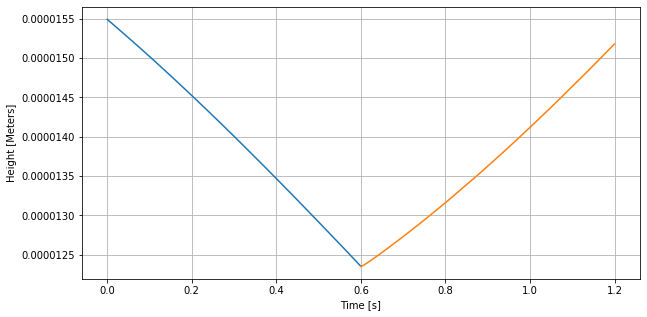

In [11]:
t0 = 0
for seg_id, segment in force_curve_segments:
    height = segment.segment_formated_data[height_channel]
    if seg_id == '1':
         height = height[::-1]
    time = segment.segment_formated_data["time"] + t0
    plt.plot(time, height)
    t0 = time[-1]

plt.xlabel("Time [s]")
plt.ylabel("Height [Meters]")
plt.grid()
plt.show()

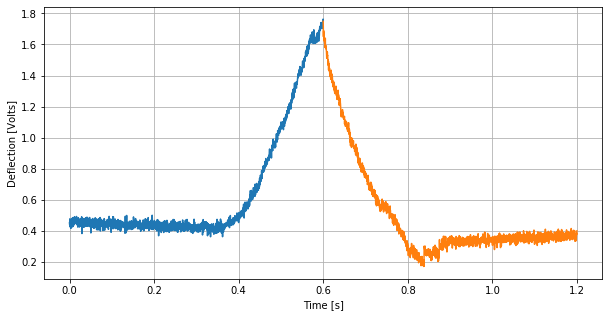

In [12]:
t0 = 0
for seg_id, segment in force_curve_segments:
    deflection = segment.segment_formated_data["vDeflection"]
    time = segment.segment_formated_data["time"] + t0
    plt.plot(time, deflection)
    t0 = time[-1]

plt.xlabel("Time [s]")
plt.ylabel("Deflection [Volts]")
plt.grid()
plt.show()

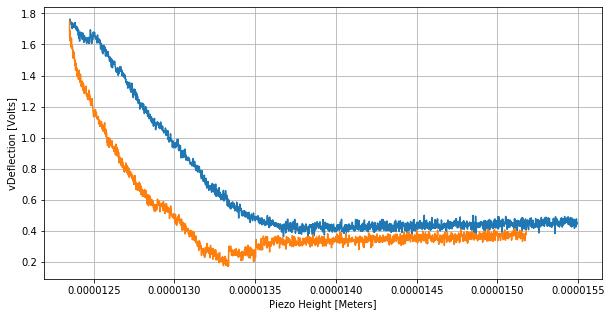

In [13]:
for seg_id, segment in force_curve_segments:
    height = segment.segment_formated_data[height_channel]
    deflection = segment.segment_formated_data["vDeflection"]
    plt.plot(height, deflection)

plt.xlabel("Piezo Height [Meters]")
plt.ylabel("vDeflection [Volts]")
plt.grid()
plt.show()

In [14]:
force_curve.preprocess_force_curve(deflection_sensitivity, height_channel)

# Get approach, first extend segment
first_exted_seg_id, first_ext_seg = extend_segments[0]

# Get retract, last retract segment
last_ret_seg_id, last_ret_seg = retract_segments[-1]

In [15]:
# Shift height
force_curve.shift_height()

In [16]:
v0t = np.abs(first_ext_seg.zheight.min() - first_ext_seg.zheight.max())/first_ext_seg.segment_metadata['duration']
v0r = np.abs(last_ret_seg.zheight.min() - last_ret_seg.zheight.max())/first_ext_seg.segment_metadata['duration']

In [17]:
t_offset = np.abs(first_ext_seg.zheight[-1] - last_ret_seg.zheight[0]) / (v0t*1e6)
dt = np.abs(first_ext_seg.time[1] - first_ext_seg.time[0])
print(t_offset > 2 * dt)
if t_offset > 2 * dt:
     last_ret_seg.time = last_ret_seg.time + t_offset

False


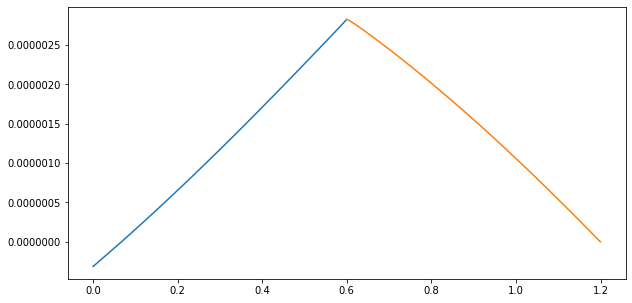

In [18]:
plt.plot(first_ext_seg.time, first_ext_seg.zheight)
plt.plot(last_ret_seg.time + first_ext_seg.time[-1], last_ret_seg.zheight)

In [19]:
app_height = first_ext_seg.zheight
app_deflection = first_ext_seg.vdeflection
ret_height = last_ret_seg.zheight
ret_deflection = last_ret_seg.vdeflection

In [20]:
first_ext_seg.velocity
first_ext_seg.segment_metadata

{'time_stamp': '2021-11-05 15\\:41\\:45.097 +0100',
 'num_points': 3000,
 'duration': 0.6000000000000001,
 'channels': ['height', 'vDeflection', 'measuredHeight'],
 'baseline_measured': True,
 'baseline': 0.4363795114745571,
 'approach_id': '2021.11.03-20.06.22-00013',
 'style': 'extend',
 'setpoint': 1.3357704473718137,
 'z_start': 3000.0,
 'z_end': 0.0,
 'ramp_size': -3000.0,
 'ramp_speed': -4999.999999999999}

In [21]:
np.abs(first_ext_seg.zheight.min() - first_ext_seg.zheight.max())

3.139533845273956e-06

In [31]:
# Find initial PoC, you may get some warnings.
poc = get_poc_RoV_method(app_height, app_deflection, 350e-9)
print(*poc)

1.505538342280261e-06 -1.8384458131696606e-10


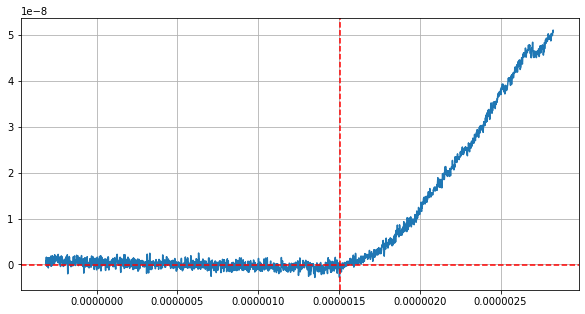

In [32]:
plt.plot(app_height, app_deflection)
plt.axvline(x=poc[0], color='r', linestyle='--')
plt.axhline(y=poc[1], color='r', linestyle='--')
plt.grid()
plt.show()

In [33]:
#plt.plot(app_height, app_deflection)
#mask = app_height<poc[0]
#plt.plot(app_height[mask], app_deflection[mask])
#z = np.poly1d(np.polyfit(app_height[mask], app_deflection[mask], 1))
#plt.plot(app_height[mask], z(app_height[mask]))
#plt.show()
#plt.plot(app_height, app_deflection-z(app_height))
#plt.plot(ret_height, ret_deflection-z(ret_height))
#first_ext_seg.vdeflection = app_deflection-z(app_height)
#last_ret_seg.vdeflection = ret_deflection-z(ret_height)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pyafmrheo/models/hertz.py:161: RuntimeWarning: divide by zero encountered in true_divide
  a = (self.get_residuals(indentation, force, sample_height)**2/force)



        # Fit parameters
        Indenter shape: paraboloid

        Tip paraneter: 3.0000000000000004e-08

        BEC Model: None

        Number of free parameters: 3

        delta0: 1.8014563394635875e-08

        E0: 1229.8359093612623

        f0: 1.4642977646599144e-12

        slope: None

        # Fit metrics
        MAE: 2.8389789171906287e-18

        MSE: 1.2239302159668587e-22

        RMSE: 1.1063137963375757e-11

        Rsq: 0.9940424536186065

        Chisq: 1.3442734483812442e-09

        RedChisq: 4.4809114946041474e-10

        
1229.8359093612623


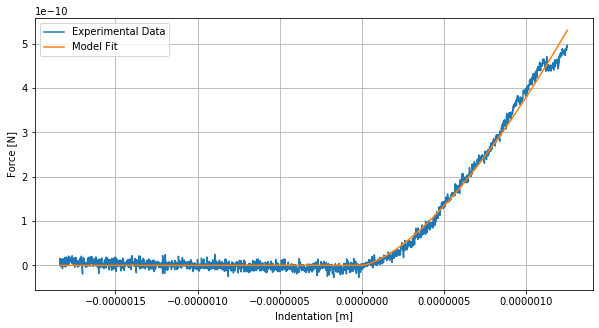

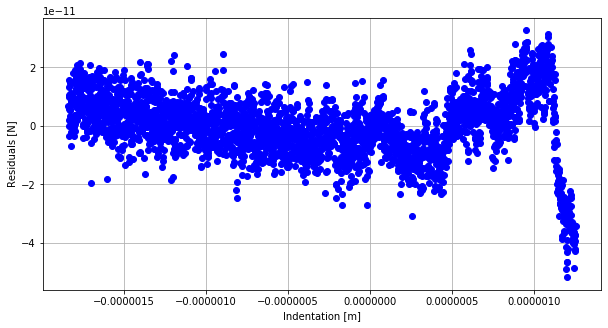

In [34]:
# Hertz fit
first_ext_seg.get_force_vs_indentation(poc, spring_constant)
app_indentation, app_force = first_ext_seg.indentation, first_ext_seg.force

# plt.plot(app_height - poc[0], app_deflection*spring_constant)
# plt.show()

# app_indentation = app_height - poc[0]
# app_force = app_deflection*spring_constant

hertzmodel = HertzModel(indenter_shape, tip_parameter)
hertzmodel.fit(app_indentation, app_force)

hertzmodel.fit_report()

hertz_E0 = hertzmodel.E0
hertz_d0 = hertzmodel.delta0
hertz_f0 = hertzmodel.f0

print(hertz_E0)

# Plot Hertz Fit results
plt.plot(app_indentation-hertz_d0, app_force-hertz_f0, label="Experimental Data")
plt.plot(app_indentation-hertz_d0, hertzmodel.eval(app_indentation)-hertz_f0, label="Model Fit")
plt.xlabel('Indentation [m]')
plt.ylabel('Force [N]')
plt.legend()
plt.grid()
plt.show()

# Plot residuals
plt.plot(app_indentation-hertz_d0, hertzmodel.get_residuals(app_indentation, app_force), "bo")
plt.xlabel('Indentation [m]')
plt.ylabel('Residuals [N]')
plt.grid()
plt.show()

In [35]:
# Get force vs indentation for all segments
poc[0] += hertz_d0

# Get indentation and force
first_ext_seg.get_force_vs_indentation(poc, spring_constant)
app_indentation, app_force, app_time = first_ext_seg.indentation, first_ext_seg.force, first_ext_seg.time
last_ret_seg.get_force_vs_indentation(poc, spring_constant)
ret_indentation, ret_force, ret_time = last_ret_seg.indentation, last_ret_seg.force, last_ret_seg.time

In [47]:
idx_tc = (np.abs(app_indentation - 0)).argmin()
t0 = app_time[-1]
indentation = np.r_[app_indentation, ret_indentation]
time = np.r_[app_time, ret_time + t0]
force = np.r_[app_force, ret_force]
fit_mask = indentation > (-1 * 1e-6)
ind_fit = indentation[fit_mask]
print(ind_fit)
force_fit = force[fit_mask]
force_fit = force_fit - force_fit[0]
time_fit = time[fit_mask]
tc_fit = tc-time_fit[0]
time_fit = time_fit - time_fit[0]
tm = time_fit[np.argmax(force_fit)]
idx_tm = np.argmax(force_fit)

[-9.99467566e-07 -9.97499556e-07 -9.96030147e-07 ... -9.96297392e-07
 -9.96939041e-07 -9.98800285e-07]


In [37]:
# indentation = np.r_[app_indentation, ret_indentation]
# yf_app_ind = app_indentation[-1]
# y0_ret_ind = ret_indentation[0]
# idx_tc = (np.abs(app_indentation - 0)).argmin()
# yf_app_f = app_force[-1]
# y0_ret_f = ret_force[0]
# t0 = app_time[-1]
# time = np.r_[app_time, ret_time + t0]
# xf_app = app_time[-1]
# x0_ret = (ret_time + t0)[0]
# dt = time[1] - time[0]
# nbrp_int = int(np.round((x0_ret-xf_app)/dt))
# points = np.linspace(xf_app, x0_ret, num=nbrp_int)
# int_points_f = np.interp(points, [xf_app, x0_ret], [yf_app_f, y0_ret_f])
# int_points_ind = np.interp(points, [xf_app, x0_ret], [yf_app_ind, y0_ret_ind])
# int_points_t = points
# idx_start = nbrp_int//2
# plt.plot(app_time, app_indentation, 'o', markersize=2)
# plt.plot(points, int_points_ind, 'o', markersize=2)
# plt.plot(ret_time + t0, ret_indentation, 'o', markersize=2)
# plt.show()
# plt.plot(app_time, app_force, 'o', markersize=2)
# plt.plot(points, int_points_f, 'o', markersize=2)
# plt.plot(ret_time + t0, ret_force, 'o', markersize=2)
# plt.show()
# indentation = np.r_[app_indentation, ret_indentation]
# fit_mask = indentation > (-1 * 1e-6)
# time = np.r_[app_time, ret_time + t0]
# force = np.r_[app_force, ret_force]
# tc = time[idx_tc]
# ind_fit = indentation[fit_mask]
# force_fit = force[fit_mask]
# force_fit = force_fit - force_fit[0]
# time_fit = time[fit_mask]
# tc_fit = tc-time_fit[0]
# time_fit = time_fit - time_fit[0]
# tm = time_fit[np.argmax(force_fit)]
# idx_tm = np.argmax(force_fit)

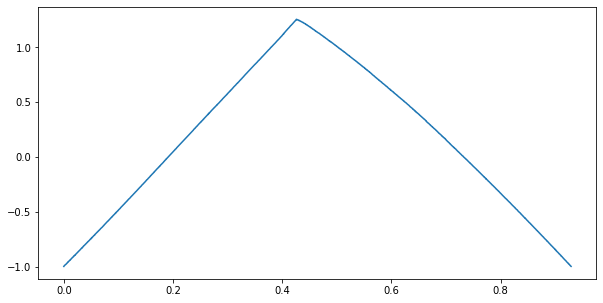

In [38]:
plt.plot(time_fit, ind_fit*1e6)

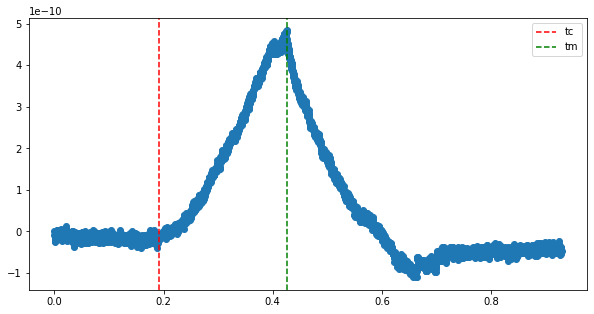

In [39]:
plt.plot(time_fit, force_fit, 'o')
plt.axvline(x=tc_fit, color='r', linestyle='--', label='tc')
plt.axvline(x=tm, color='g', linestyle='--', label='tm')
plt.legend()
plt.show()

In [49]:
downfactor=int(len(time_fit)//300)
# downfactor=1
idxDown = list(range(0, len(time_fit), downfactor))
idx_tm = np.argmax(force_fit[idxDown])
f0idx = np.where(time_fit==tc_fit)[0]
# vdrag = 1*1e3*1e-9
vdrag = 0
F0_init=force_fit[f0idx]

In [50]:
tc_max = tc_fit+downfactor/(1/(time_fit[1]-time_fit[0]))*10
tc_min = tc_fit-downfactor/(1/(time_fit[1]-time_fit[0]))*10
f0_max = F0_init+100e-12
f0_min = F0_init-100e-12

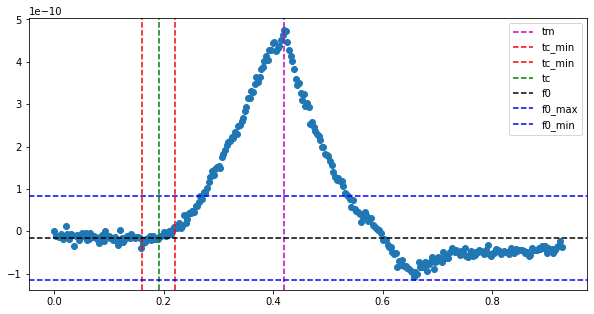

In [51]:
plt.plot(time_fit[idxDown], force_fit[idxDown], 'o')
plt.axvline(x=time_fit[idxDown][idx_tm], color='m', linestyle='--', label='tm')
plt.axvline(x=tc_min, color='r', linestyle='--', label='tc_min')
plt.axvline(x=tc_max, color='r', linestyle='--', label='tc_min')
plt.axvline(x=tc_fit, color='g', linestyle='--', label='tc')
plt.axhline(y=F0_init, color='k', linestyle='--', label='f0')
plt.axhline(y=f0_max, color='b', linestyle='--', label='f0_max')
plt.axhline(y=f0_min, color='b', linestyle='--', label='f0_min')
plt.legend()
plt.show()

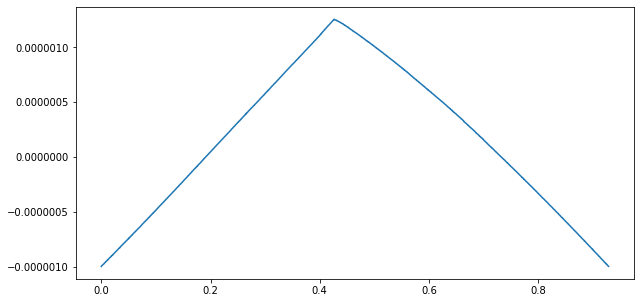

In [53]:
plt.plot(time_fit, ind_fit)

In [46]:
from lmfit import Model, Parameters
ting_model_num = TingModel(indenter_shape, tip_parameter, 'numerical')
smooth_w = 1
t0 = 1
modelFt = 'numerical'
v0t = np.abs(first_ext_seg.zheight.min() - first_ext_seg.zheight.max())/first_ext_seg.segment_metadata['duration']
v0r = np.abs(last_ret_seg.zheight.min() - last_ret_seg.zheight.max())/first_ext_seg.segment_metadata['duration']
# modelFt = 'numerical'
idx_tm = np.argmax(force_fit[idxDown])
model_for_fit = lambda time, E0, tc, betaE, F0: ting_model_num.objective(time, E0, tc, betaE, F0, t0, force_fit, ind_fit, modelFt, vdrag, idx_tm, smooth_w, v0t, v0r)
model = Model(model_for_fit)
print(f'parameter names: {model.param_names}')
print(f'independent variables: {model.independent_vars}')
print(hertz_E0)
params = Parameters()
params.add('E0', value=hertz_E0, min=hertz_E0/1000, max=np.inf)
params.add('tc', value=tc_fit, min=tc_min, max=tc_max)
params.add('betaE', value=0.25, min=0.01, max=0.49)
params.add('F0', value=F0_init, min=f0_min, max=f0_max)

result = model.fit(force_fit, params, time=time_fit)

parameter names: ['E0', 'tc', 'betaE', 'F0']
independent variables: ['time']
1229.8359093612623


IndexError: index 0 is out of bounds for axis 0 with size 0

In [44]:
for param, value in result.best_values.items():
    print(f'{param}:{value}')

NameError: name 'result' is not defined

NameError: name 'result' is not defined

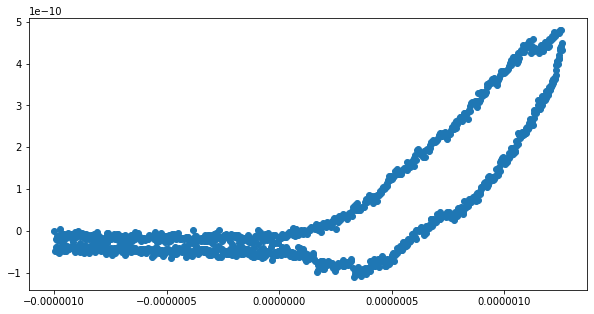

In [45]:
plt.plot(ind_fit[idxDown], force_fit[idxDown], 'o')
# plt.plot(time_fit[idxDown], result.init_fit, '--', label='initial fit')
plt.plot(ind_fit[idxDown], result.best_fit, '-', label='best fit')
plt.legend()
plt.show()